In [1]:
import numpy as np
import os
import multiprocessing as mul
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads, vectorize
from tqdm import tqdm
import pickle
import scipy.stats as st
import scipy.interpolate as interp
import argparse as ap

from core.stacking_analysis import *

In [2]:
enus = np.ones(10**7)
cone_deg=4.0

In [3]:
all_TS_same_psr = pickle.load(open(f'./pickle/all_TSS_{len(enus)}_bins_C_{cone_deg}_wt_valid_dDM_s14.pkl', 'rb'))

all_TS_mixed_pkl = pickle.load(open(f'./pickle/all_TSS_{len(enus)}_bins_C_{cone_deg}_mixed.pkl', 'rb'))
phio = np.logspace(-38, -26, 1000)

phio_paper = 6 * np.pi * 1.44e-27
ic_e_paper = np.logspace(np.log10(1.5e13), np.log10(5e15), 5)
e2dfde_ic = np.multiply(ic_e_paper**2, dfde(ic_e_paper, -2.37, 1) * phio_paper)

In [4]:
gamma_arr = np.asarray([-2.2, -2, -2.53, -3])

e_decade = [1e12, 1e13, 1e14, 1e15, 1e16]
all_e_UL = []
for e_UL in e_decade:
    e2dfde = []

    for gamma in prange(len(gamma_arr)):
        temp = []
        for phi in range(len(phio)):
            temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
        e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)

    all_e_UL.append(e2dfde)

In [5]:
all_UL_mixed = []
for ws in range(3):
    temp2 = []
    for gamma in prange(len(gamma_arr)):
        temp = []
        for i in all_e_UL:
            dist_g = interp.interp1d(all_TS_mixed_pkl[ws][gamma], i[gamma]/1e9)
            temp.append(dist_g(-3.84))

        # print(max(temp), gamma_arr[gamma])    
        temp2.append(temp)
    all_UL_mixed.append(temp2)
    
all_UL_mixed = np.asarray(all_UL_mixed)

all_UL_same = []
for ws in range(3):
    temp2 = []
    for gamma in prange(len(gamma_arr)):
        temp = []
        for i in all_e_UL:
            dist_g = interp.interp1d(all_TS_same_psr[ws][gamma], i[gamma]/1e9)
            temp.append(dist_g(-3.84))

        # print(max(temp), gamma_arr[gamma])    
        temp2.append(temp)
    all_UL_same.append(temp2)

547.6585211155291
5.1158556568958294e-12
547.6585211155291
7.490292826203725e-09
547.6585211155291
3.1012343506852383e-09


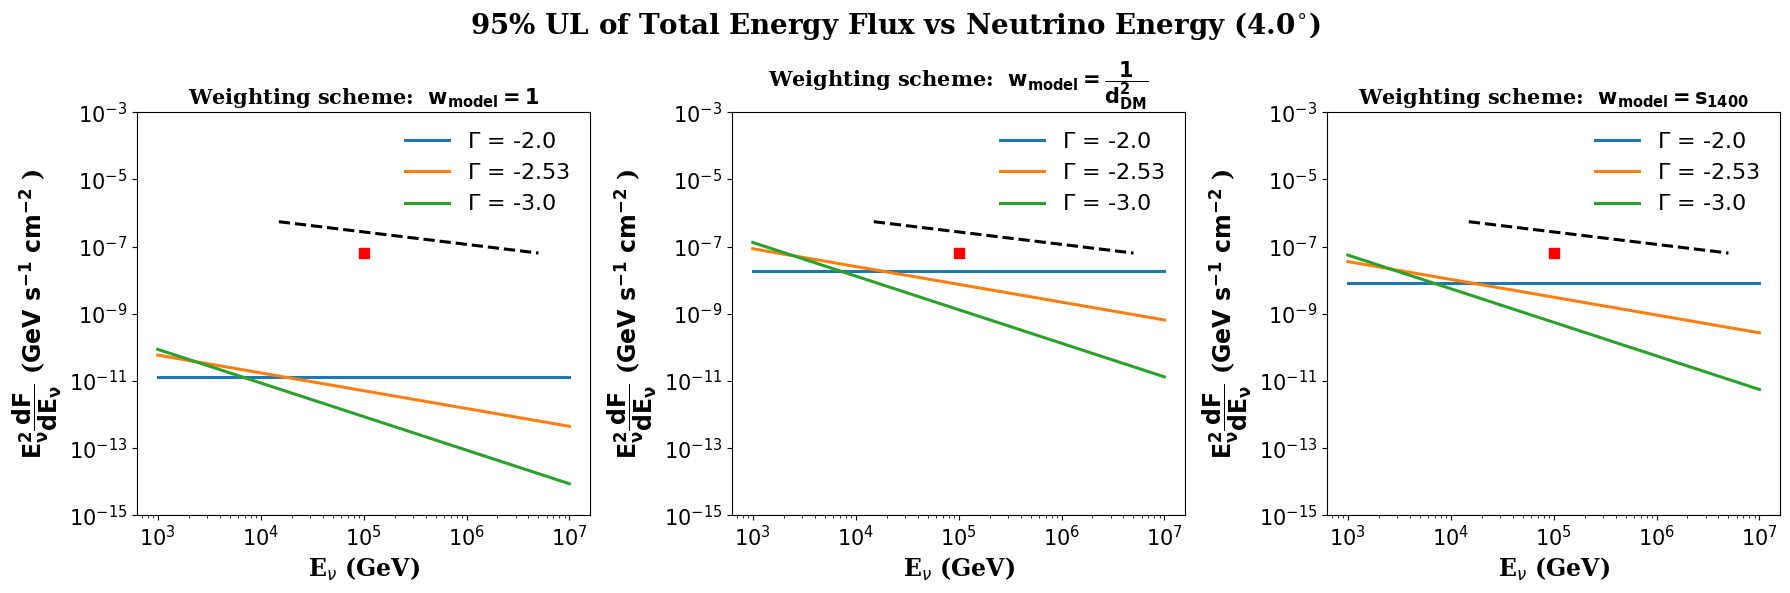

done


In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,3, figsize=(18, 6))


for i in range(3):
    axs[i].scatter(e_decade[2]/1e9, 3*21.8*1e-9,  color='red', s=50, marker='s')    
    axs[i].plot(ic_e_paper/1e9, e2dfde_ic/1e9,  lw=2.2, ls='--', color='black')    #in GeV  
    print(max(e2dfde_ic))
          
    for gamma in range(1, len(gamma_arr)):

        axs[i].plot(np.divide(e_decade, 1e9), np.multiply(all_UL_mixed[i][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV
    
    print(3*all_UL_mixed[i][2][2])


    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
    axs[i].set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
    axs[i].xaxis.set_tick_params(labelsize=15)
    axs[i].yaxis.set_tick_params(labelsize=15)
    axs[i].set_ylim(1e-15, 1e-3)
    axs[i].legend(prop={'size':16}, framealpha=0)#, loc='center left', bbox_to_anchor=(0, 0.65))


axs[0].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
axs[1].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
axs[2].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)

if cone_deg == 5:
    plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
else: 
    plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy (' + str(cone_deg) + '$^{\circ}$)', fontweight='bold', fontsize=20, fontfamily='serif')
    
plt.tight_layout()
plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wmodel_all_{cone_deg}_mixed.pdf')
plt.show()
print('done')

In [7]:
for i in range(3):
    print(3*all_UL_mixed[i][2][2])

1.1614857875743173e-11
8.521861170709355e-09
3.3772632376372785e-09


In [8]:
for i in range(3):
    print((300*all_UL_mixed[i][2][2]) / (3*21.8*1e-9))

0.017759721522543074
13.03036876255253
5.164011066723668


In [9]:
dada = interp.interp1d(ic_e_paper/1e9, e2dfde_ic/1e9)
dada(1e6)

array(1.24004209e-07)

In [10]:
for i in range(3):
    print((300*all_UL_mixed[i][2][2]) / (3*dada(1e6)))

0.003122167635376871
2.2907451322266983
0.9078356437507885


In [11]:
for i in range(3):
    print((3*all_UL_mixed[i][2][2]) / (3*e2dfde_ic[np.argmin(ic_e_paper - 1e14)]))

7.0694039125480335e-15
5.186845964617467e-12
2.055577278799028e-12


In [12]:
(3*e2dfde_ic[np.argmin(ic_e_paper - 1e14)])

1642.9755633465873

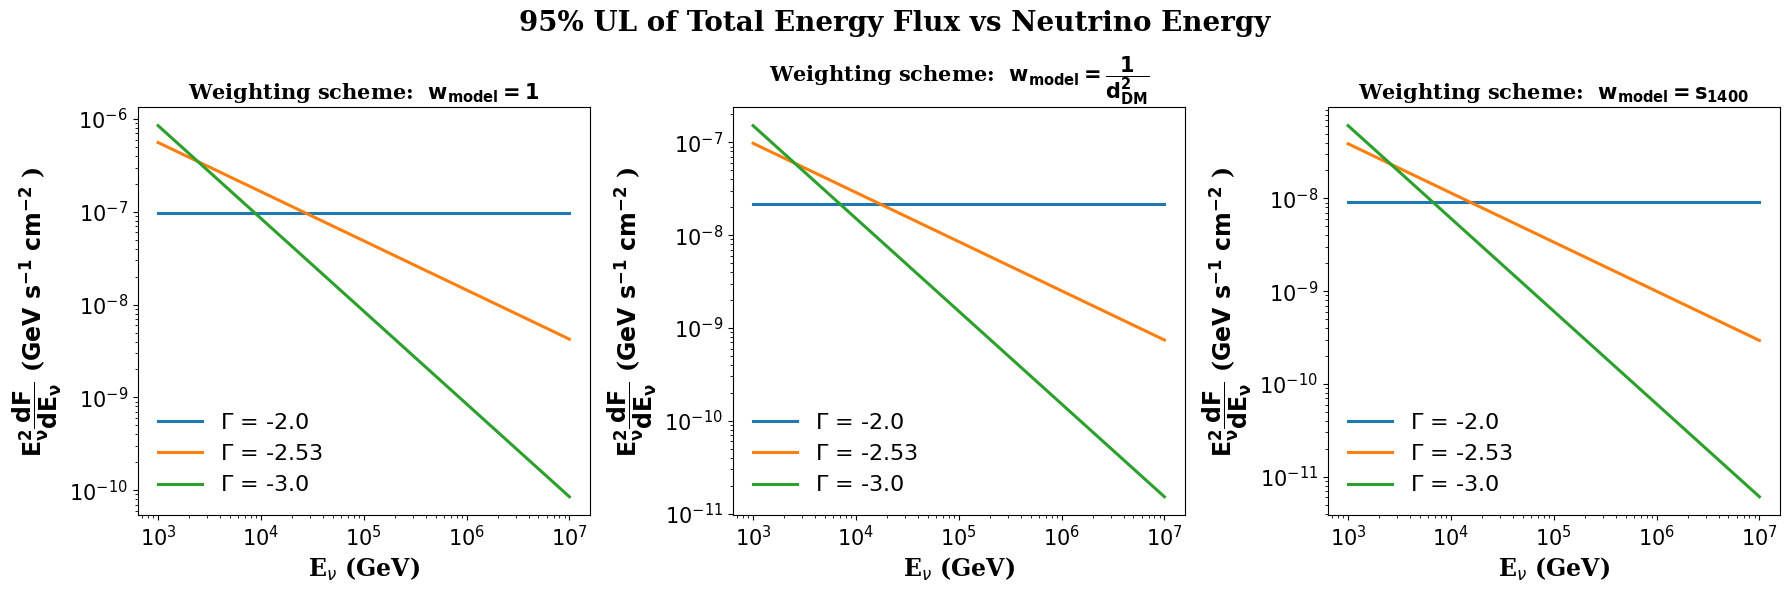

done


In [13]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,3, figsize=(18, 6))


for i in range(3):
    for gamma in range(1, len(gamma_arr)):

        axs[i].plot(np.divide(e_decade, 1e9), np.multiply(all_UL_same[i][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV
        # axs[i].scatter(np.divide(e_decade, 1e9), np.multiply(all_UL_wd_ws[i-1][gamma], 3))
#     axs[i].plot(ic_e_paper/1e9, e2dfde_ic, label='IceCube', lw=2.2, ls='--', color='black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
    axs[i].set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
    axs[i].xaxis.set_tick_params(labelsize=15)
    axs[i].yaxis.set_tick_params(labelsize=15)
    
    axs[i].legend(prop={'size':16}, framealpha=0)


axs[0].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
axs[1].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
axs[2].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)

# if cone_deg == 5:
plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
    
plt.tight_layout()
plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wmodel_all_{cone_deg}_same_psrs.pdf')
plt.show()
print('done')

In [14]:
wschemes = ['1', '1/dDM^2', 's1400']

print(('wt_scheme', 'smae #ps', 'diff #psr'))
for i in range(3):
    print((wschemes[i], all_UL_same[i][2][2], all_UL_mixed[i][2][2]) )

('wt_scheme', 'smae #ps', 'diff #psr')
('1', array(1.62239e-08), 3.871619291914391e-12)
('1/dDM^2', array(2.84062039e-09), 2.8406203902364516e-09)
('s1400', array(1.12575441e-09), 1.1257544125457596e-09)
